In [2]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from matplotlib.pyplot import rc
rc('font',family='New Gulim')

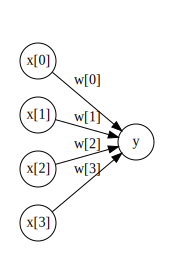

In [5]:
display(mglearn.plots.plot_logistic_regression_graph())

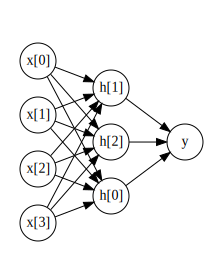

In [6]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0,0.5,'relu(x), tanh(x)')

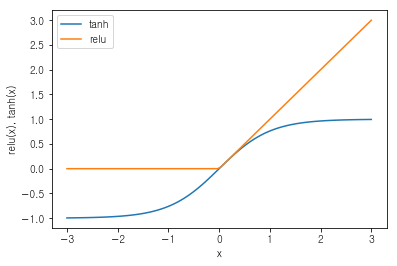

In [11]:
line=np.linspace(-3,3,100)
plt.plot(line, np.tanh(line),label="tanh")
plt.plot(line, np.maximum(line,0),label='relu')
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

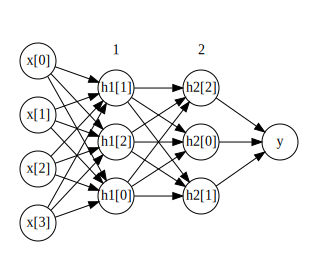

In [12]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0,0.5,'특성 1')

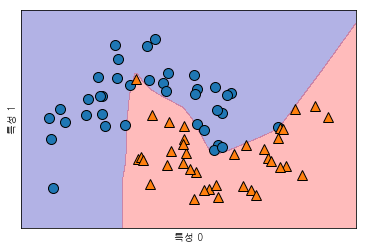

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
mlp=MLPClassifier(solver='lbfgs', random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

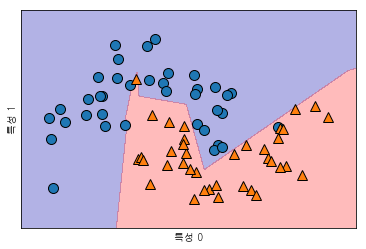

In [18]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

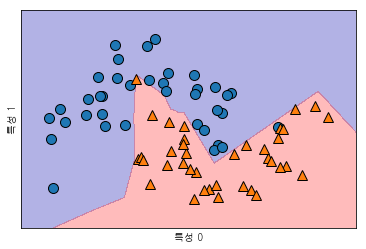

In [19]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

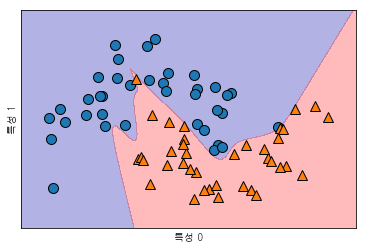

In [20]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

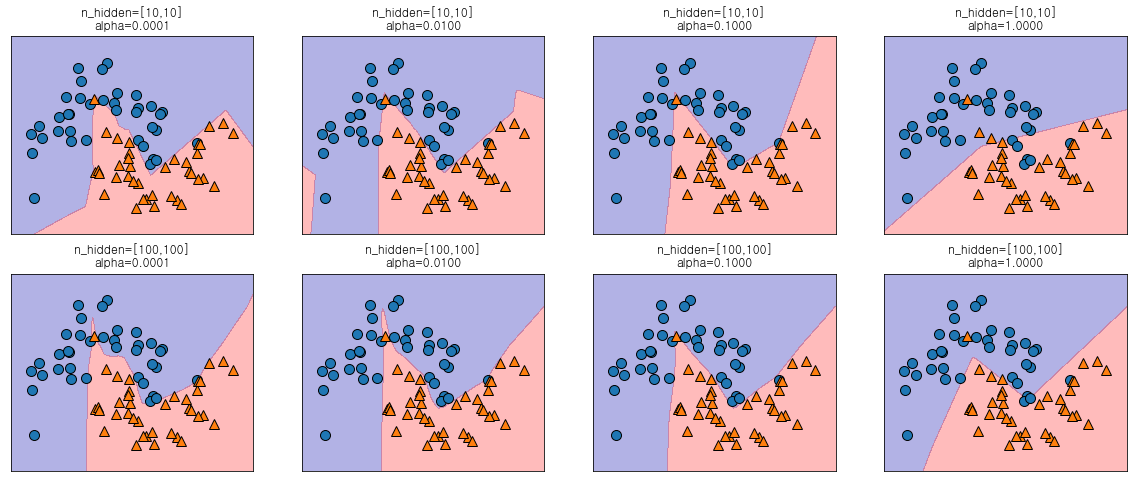

In [23]:
fig, axes= plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx, [0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, ax=ax)
        ax.set_title('n_hidden=[{},{}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

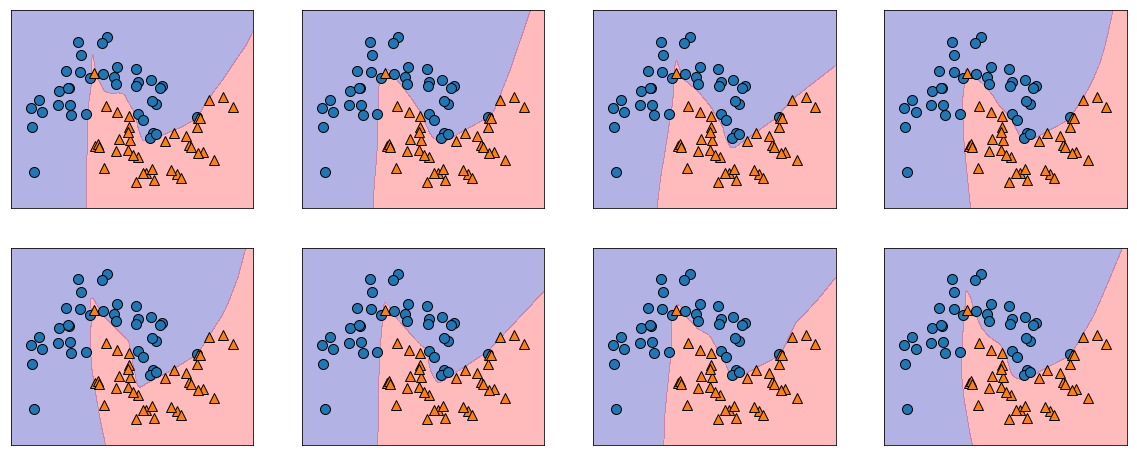

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)


In [28]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print('breast cancer feature\'s maximum:\n{}'.format(cancer.data.max(axis=0)))

breast cancer feature's maximum:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [29]:
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))


훈련 세트 정확도: 0.91
테스트 세트 정확도: 0.88


In [30]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\la\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.993
테스트 세트 정확도: 0.972


In [32]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


훈련 세트 정확도: 0.988
훈련 세트 정확도: 0.972


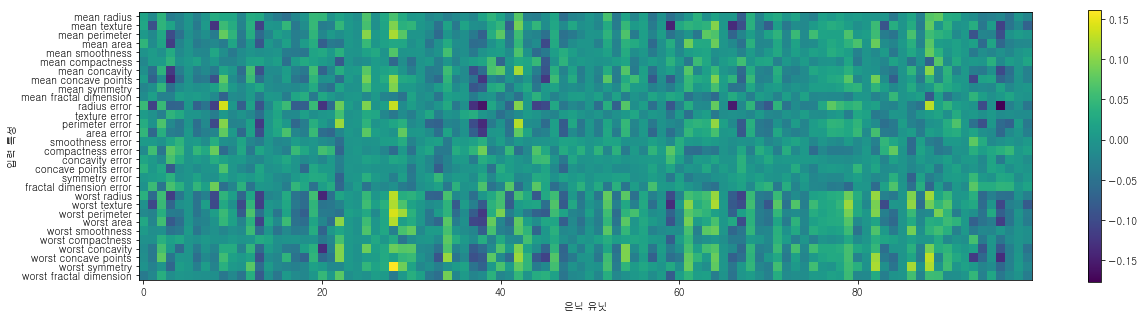

In [36]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()